In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
from fastbook import *
from pathlib import Path

In [140]:
##mount google drive for imagedata and return number of images
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)
root_path = 'gdrive/My Drive/shuntimages/'  

files = get_image_files("/content/gdrive/My Drive/shuntimages")
len(files)

Mounted at /content/gdrive


400

Setting up after_item: Pipeline: Resize -- {'size': (240, 240), 'method': 'squish', 'pad_mode': 'reflection', 'resamples': (2, 0), 'p': 1.0} -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1} -> Flip -- {'size': 224, 'mode': 'bilinear', 'pad_mode': 'reflection', 'mode_mask': 'nearest', 'align_corners': True, 'p': 0.5} -> Brightness -- {'max_lighting': 0.2, 'p': 1.0, 'draw': None, 'batch': False}
['codmanhakim', 'medtronic_ps_medical_strata', 'progav', 'progav2']


(4, 4)

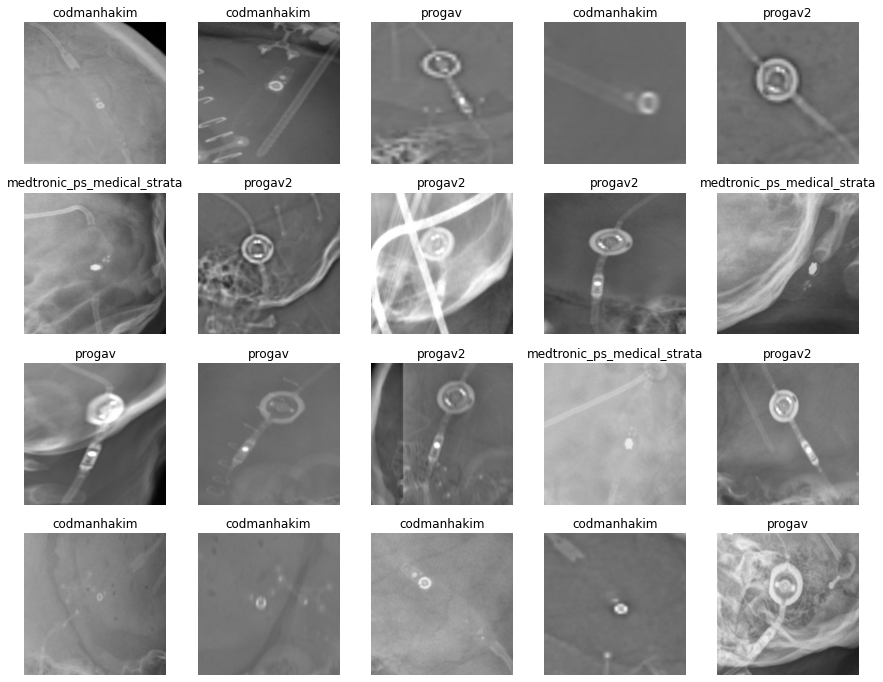

In [153]:
#Setting up the Image Batch
imagepath = Path("/content/gdrive/My Drive/shuntimages")

shunts = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(),
                 get_y=RegexLabeller(pat = r'/([^/]+)_\.*'),
                 item_tfms=Resize(240, method='squish'),
                 batch_tfms=[*aug_transforms(size=224, max_warp=0, max_rotate=0, max_zoom=0)],
                 )

dls = shunts.dataloaders(imagepath, verbose=true, bs=32)
dls.show_batch(max_n = 20)

print(dls.vocab)
len(dls.vocab),dls.c


SuggestedLRs(lr_min=0.03019951581954956, lr_steep=0.0010000000474974513)

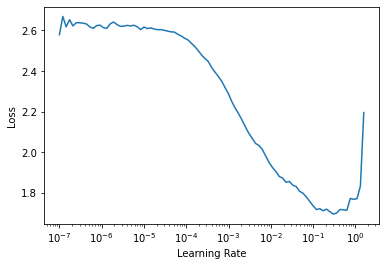

In [149]:
learn = Learner(dls, xresnet34(n_out=10), metrics=accuracy)
##learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.5))

learn.lr_find()

In [150]:
learn.fine_tune(5)


epoch,train_loss,valid_loss,accuracy,time
0,1.985494,1.579799,0.350000,00:05


epoch,train_loss,valid_loss,accuracy,time
0,1.068734,1.410292,0.425000,00:05
1,1.013214,1.402467,0.437500,00:05
2,0.937180,1.167992,0.500000,00:05
3,0.875476,1.202410,0.612500,00:05
4,0.813768,0.878843,0.662500,00:05


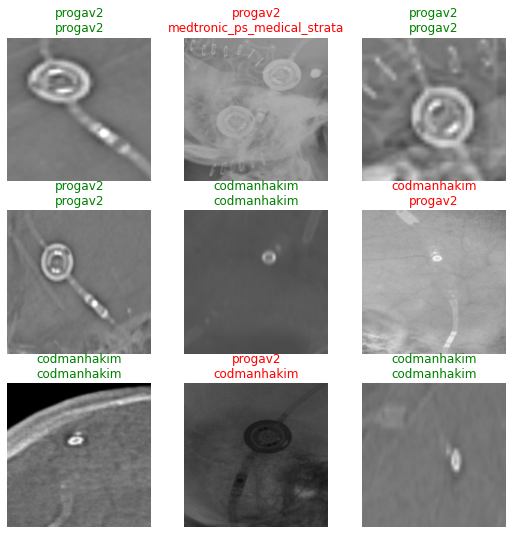

In [151]:
learn.show_results()

                             precision    recall  f1-score   support

                codmanhakim       0.70      0.92      0.79        25
medtronic_ps_medical_strata       0.50      0.22      0.31         9
                     progav       0.00      0.00      0.00        14
                    progav2       0.65      0.88      0.75        32

                   accuracy                           0.66        80
                  macro avg       0.46      0.50      0.46        80
               weighted avg       0.53      0.66      0.58        80



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


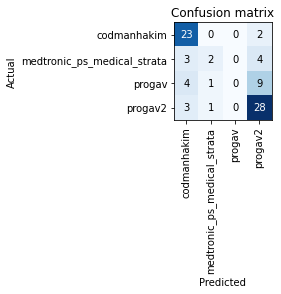

In [152]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.print_classification_report()

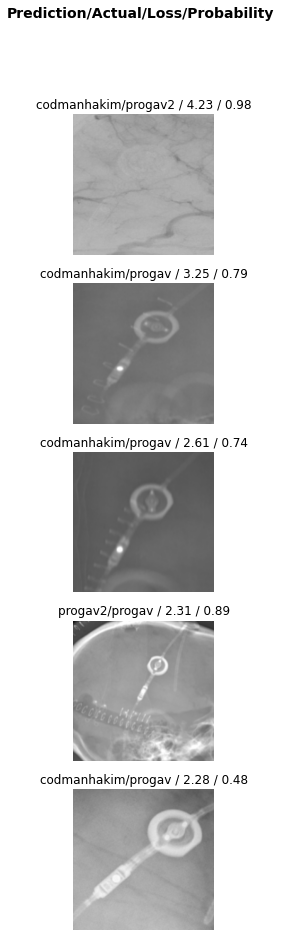

In [139]:
interp.plot_top_losses(5, nrows=5)
